# **Maternal Health Risk Classification Algorithms using ML**

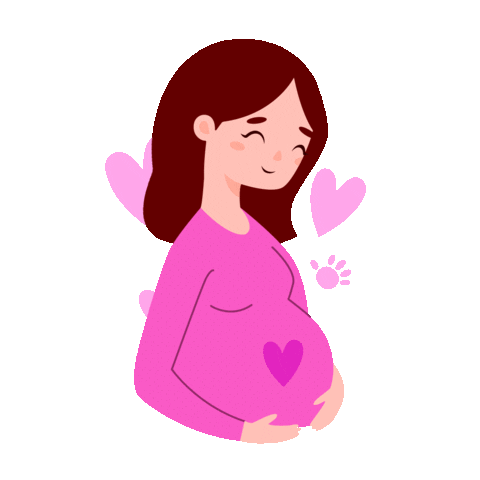

# **Introduction**

- Collected by Marzia Ahmed from Daffodil International University, Dhaka, Bangladesh.

- Attributes that affect Pregnant woman health.

## **Load Data**


In [ ]:
import pandas as pd
data = pd.read_csv('Maternal Health Risk Data Set.csv')
data


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


**Age**: Any ages in years when a women during pregnant.

**SystolicBP**: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.

**DiastolicBP**: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.

**BS**: Blood glucose levels is in terms of a molar concentration, mmol/L.

**HeartRate**: A normal resting heart rate in beats per minute.

**Risk Level**: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


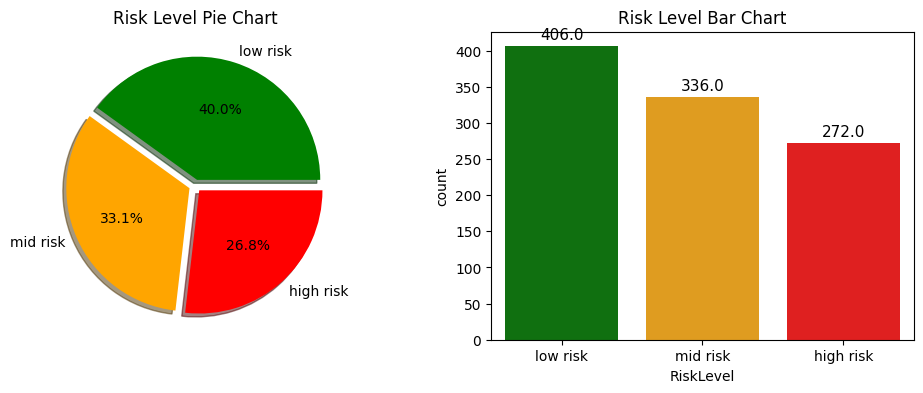

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
p_colors = ['green', 'orange', 'red']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

data["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="RiskLevel", data=data, ax=ax[1], order=risk_order, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Risk Level Bar Chart")
plt.show()


Most pregnant women in this dataset mostly has low health risk. Out of 1014 observations, **406 (40%)** of pregnant women has **low risk**, **336 (33.1%)** has **med risk**, and **272 (26.8%)** has high risk.

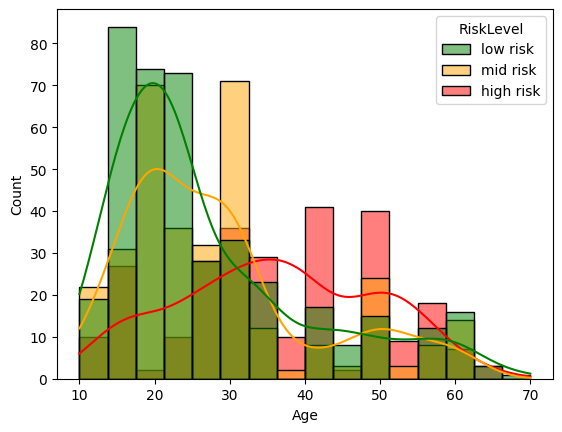

In [ ]:
sns.histplot(data=data, x="Age", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()


**Observation:**

1- Pregnant women aged below 24 years mostly has low health risk.

2- Health risks will start to increase after that age (starting from the age of 25 years).

3- The health risk of pregnant women over 59 years old is decreased

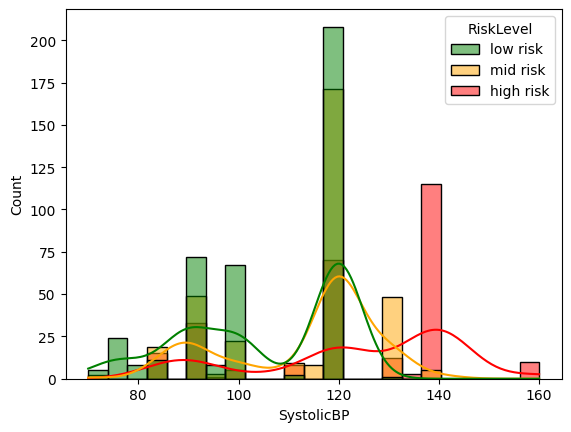

In [ ]:
sns.histplot(data=data, x="SystolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()


**Observation:**

1- Pregnant women with upper value of blood pressure >= 100 mmHg mostly has low health risk.

2- The higher pregnant women's blood pressure, the higher the health risk

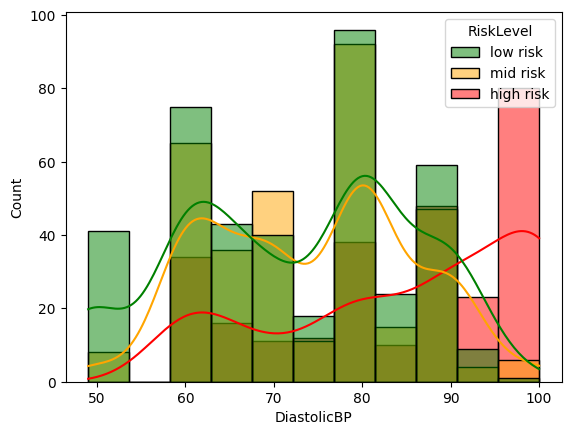

In [ ]:
sns.histplot(data=data, x="DiastolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()


**Observation:**

1- Similar to SystolicBP

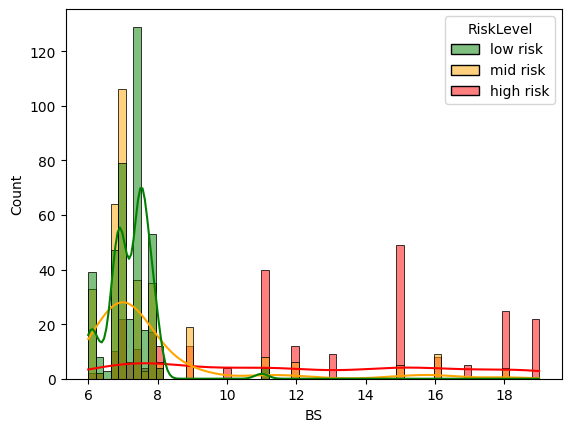

In [ ]:
sns.histplot(data=data, x="BS", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()


**Observation:**

Almost every pregnant women with blood glucose level >= 8 has high health risk.
But otherwise, they seems to have lower health risk with blood glucose < 8

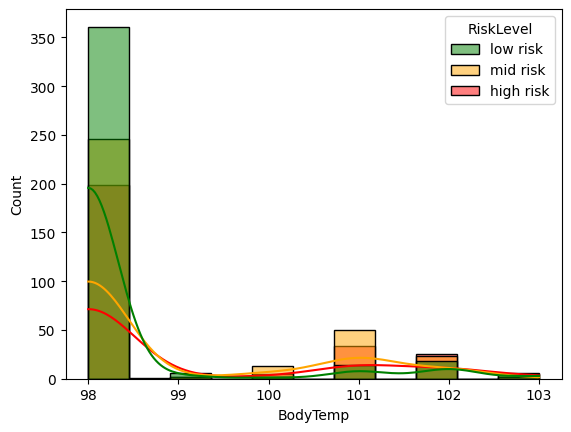

In [ ]:
sns.histplot(data=data, x="BodyTemp", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()


**Observation:**

1. Most pregnant women seem to have a body temperature of 98 F, which is normal body temperature

2. Pregnant women with body temperature >= 100 mostly has higher health risk

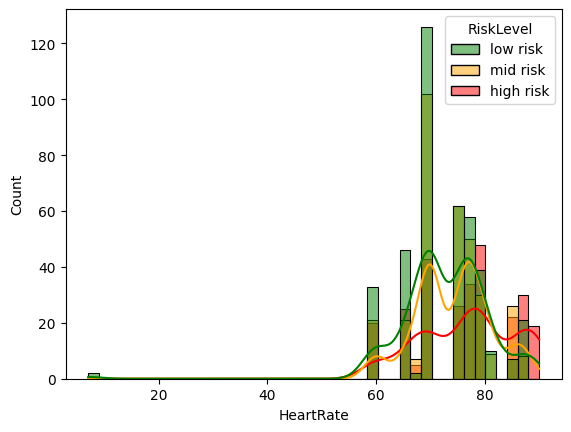

In [ ]:
sns.histplot(data=data, x="HeartRate", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()


**Observation:**

Health risks seem to be getting higher along with the number of heart rate.

## **Data Preparation**

In [ ]:
# Separate the features (X) and the target variable (y)
X = data.drop('RiskLevel', axis=1)
X


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80
1010,55,120,90,18.0,98.0,60
1011,35,85,60,19.0,98.0,86
1012,43,120,90,18.0,98.0,70


In [ ]:
y=data['RiskLevel']
y


0       high risk
1       high risk
2       high risk
3       high risk
4        low risk
          ...    
1009    high risk
1010    high risk
1011    high risk
1012    high risk
1013     mid risk
Name: RiskLevel, Length: 1014, dtype: object

## **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
#80% of data
X_train.info()
X_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 684 to 520
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          811 non-null    int64  
 1   SystolicBP   811 non-null    int64  
 2   DiastolicBP  811 non-null    int64  
 3   BS           811 non-null    float64
 4   BodyTemp     811 non-null    float64
 5   HeartRate    811 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 44.4 KB


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
684,32,140,100,6.90,98.0,78
363,32,140,90,18.00,98.0,88
159,25,100,90,7.50,98.0,76
558,45,120,95,7.50,98.0,66
494,32,120,90,7.90,98.0,70
...,...,...,...,...,...,...
855,20,120,75,7.01,100.0,70
871,29,130,70,6.70,98.0,78
835,29,130,70,7.50,98.0,78
792,25,120,100,6.80,98.0,60


In [ ]:
#20% of data
X_test.info()
X_test


<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 849 to 815
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          203 non-null    int64  
 1   SystolicBP   203 non-null    int64  
 2   DiastolicBP  203 non-null    int64  
 3   BS           203 non-null    float64
 4   BodyTemp     203 non-null    float64
 5   HeartRate    203 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 11.1 KB


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
849,10,100,50,6.0,99.0,70
48,15,76,49,7.5,98.0,77
358,18,90,60,6.9,98.0,70
531,15,120,80,7.5,98.0,70
149,37,120,90,11.0,98.0,88
...,...,...,...,...,...,...
484,19,120,85,7.9,98.0,60
213,60,90,65,7.0,98.0,77
110,50,140,95,17.0,98.0,60
28,49,120,90,7.2,98.0,77


## **Model Building**

### **K-Nearest Neighbor**

####**Train the Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(X_train, y_train)


KNeighborsClassifier()

#### **Apply the Model to Make a Prediction**

In [ ]:
y_kn_train_pred= kn.predict(X_train)
y_kn_test_pred= kn.predict(X_test)


#### **Evaluate Model Performance**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Accuracy
train_accuracy = accuracy_score(y_train, y_kn_train_pred)
print("Accuracy of Train:", train_accuracy)
test_accuracy = accuracy_score(y_test, y_kn_test_pred)
print("Accuracy of Test:", test_accuracy)


Accuracy of Train: 0.7928483353884094
Accuracy of Test: 0.6896551724137931


In [ ]:
# Classification Report
classification_rep = classification_report(y_test, y_kn_test_pred)
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

   high risk       0.80      0.71      0.75        56
    low risk       0.72      0.74      0.73        91
    mid risk       0.55      0.59      0.57        56

    accuracy                           0.69       203
   macro avg       0.69      0.68      0.68       203
weighted avg       0.70      0.69      0.69       203



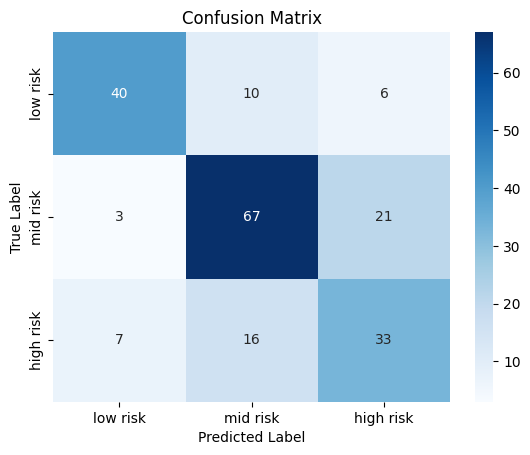

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_kn_test_pred)
class_labels = ['low risk', 'mid risk', 'high risk']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
sum=pd.DataFrame(['K-Neareast Neighbor',train_accuracy,test_accuracy]).transpose()
sum.columns=['Method','Train Accuracy','Test Accuracy']

In [ ]:
sum

,Method,Train Accuracy,Test Accuracy
0,K-Neareast Neighbor,0.792848,0.689655


### **Naive Bayes**

####**Train the Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

#### **Apply the Model to Make a Prediction**

In [ ]:
y_nb_train_pred= nb.predict(X_train)
y_nb_test_pred= nb.predict(X_test)


#### **Evaluate Model Performance**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Accuracy
train_accuracy = accuracy_score(y_train, y_nb_train_pred)
print("Accuracy of Train:", train_accuracy)
test_accuracy = accuracy_score(y_test, y_nb_test_pred)
print("Accuracy of Test:", test_accuracy)


Accuracy of Train: 0.5967940813810111
Accuracy of Test: 0.6502463054187192


In [ ]:
# Classification Report
classification_rep = classification_report(y_test, y_nb_test_pred)
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

   high risk       0.85      0.70      0.76        56
    low risk       0.64      0.95      0.76        91
    mid risk       0.30      0.12      0.18        56

    accuracy                           0.65       203
   macro avg       0.60      0.59      0.57       203
weighted avg       0.61      0.65      0.60       203



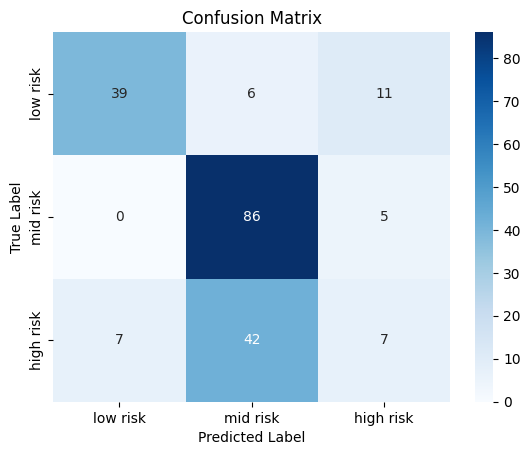

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_nb_test_pred)
class_labels = ['low risk', 'mid risk', 'high risk']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
sum1=pd.DataFrame(['Naive Bayes',train_accuracy,test_accuracy]).transpose()
sum1.columns=['Method','Train Accuracy','Test Accuracy']

In [ ]:
sum1

,Method,Train Accuracy,Test Accuracy
0,Naive Bayes,0.596794,0.650246


### **Decision Tree**

####**Train the Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

#### **Apply the Model to Make a Prediction**

In [ ]:
y_dt_train_pred= dt.predict(X_train)
y_dt_test_pred= dt.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Accuracy
train_accuracy = accuracy_score(y_train, y_dt_train_pred)
print("Accuracy of Train:", train_accuracy)
test_accuracy = accuracy_score(y_test, y_dt_test_pred)
print("Accuracy of Test:", test_accuracy)


Accuracy of Train: 0.9247842170160296
Accuracy of Test: 0.8177339901477833


In [ ]:
# Classification Report
classification_rep = classification_report(y_test, y_dt_test_pred)
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

   high risk       0.86      0.89      0.88        56
    low risk       0.88      0.79      0.83        91
    mid risk       0.70      0.79      0.74        56

    accuracy                           0.82       203
   macro avg       0.81      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203



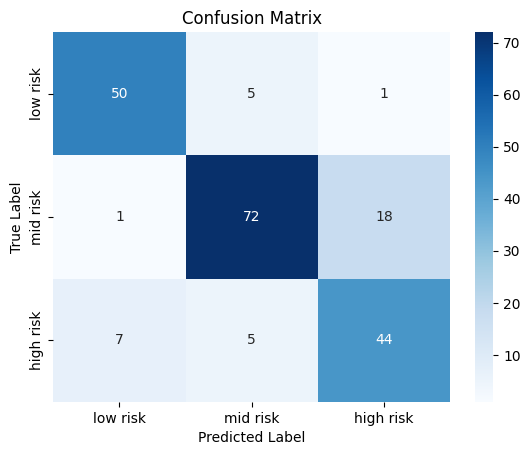

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_dt_test_pred)
class_labels = ['low risk', 'mid risk', 'high risk']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
sum3=pd.DataFrame(['Desicion Tree',train_accuracy,test_accuracy]).transpose()
sum3.columns=['Method','Train Accuracy','Test Accuracy']

In [ ]:
sum3

,Method,Train Accuracy,Test Accuracy
0,Desicion Tree,0.924784,0.817734


# **Conclusion**

## **Model Comparision**

In [ ]:
ml_models=pd.concat([sum,sum1,sum3],axis=0)
ml_models

,Method,Train Accuracy,Test Accuracy
0,K-Neareast Neighbor,0.792848,0.689655
0,Naive Bayes,0.596794,0.650246
0,Desicion Tree,0.924784,0.817734


In [ ]:
sum4=pd.DataFrame(['Desicion Tree (Implemented)',"82.76%",'Desicion Tree (Previous)',"70.94-94.30%"]).transpose()
sum4.columns=['Model (Implemented)','Test Accuracy','Model (Previous)','Test Accuracy']
sum4

,Model (Implemented),Test Accuracy,Model (Previous),Test Accuracy
0,Desicion Tree (Implemented),82.76%,Desicion Tree (Previous),70.94-94.30%


In [ ]:
sum5=pd.DataFrame(['KNN (Implemented)',"68.95%",'KNN (Previous)',"63.23-80.30%"]).transpose()
sum5.columns=['Model (Implemented)','Test Accuracy','Model (Previous)','Test Accuracy']
sum5

,Model (Implemented),Test Accuracy,Model (Previous),Test Accuracy
0,KNN (Implemented),68.95%,KNN (Previous),63.23-80.30%


In [ ]:
sum6=pd.DataFrame(['Naive Bayes (Implemented)',"65.02%",'Naive Bayes (Previous)',"63.23-67.09%"]).transpose()
sum6.columns=['Model (Implemented)','Test Accuracy','Model (Previous)','Test Accuracy']
sum6

,Model (Implemented),Test Accuracy,Model (Previous),Test Accuracy
0,Naive Bayes (Implemented),65.02%,Naive Bayes (Previous),63.23-67.09%


In [ ]:
ml_com=pd.concat([sum4,sum5,sum6],axis=0)
ml_com

,Model (Implemented),Test Accuracy,Model (Previous),Test Accuracy
0,Desicion Tree (Implemented),82.76%,Desicion Tree (Previous),70.94-94.30%
0,KNN (Implemented),68.95%,KNN (Previous),63.23-80.30%
0,Naive Bayes (Implemented),65.02%,Naive Bayes (Previous),63.23-67.09%


**Conclusion**

1
) **BS or blood glucose level** is the most important variable in determining the health level of pregnant women. Pregnant women who have high blood glucose level tend to have high health risks. **More than 75% of pregnant women with BS of 8 or more have high health risk.**

2)  **Age** is also a fairly important variable, where the health risks of pregnant women seem to start to **increase starting from the age of 25 years**.

3) Among KNN, Naive Bayes and Decision Trees, **Decision Trees have higher classification accuray.**
